In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
from sklearn.manifold import TSNE
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,homogeneity_score

In [3]:
from sklearn.manifold import Isomap
from sklearn.cluster import SpectralClustering
from sklearn.manifold import LocallyLinearEmbedding

In [4]:
from sklearn.decomposition import PCA

In [5]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
data1 = unpickle("resources/cifar-10-batches-py/data_batch_1")
data2 = unpickle("resources/cifar-10-batches-py/data_batch_2")
data3 = unpickle("resources/cifar-10-batches-py/data_batch_3")
data4 = unpickle("resources/cifar-10-batches-py/data_batch_4")
data5 = unpickle("resources/cifar-10-batches-py/data_batch_5")

In [7]:
datam = unpickle("resources/cifar-10-batches-py/batches.meta")

In [8]:
X1 = pd.DataFrame(data1[b'data'])
Y1 = pd.DataFrame(data1[b'labels'])
X2 = pd.DataFrame(data2[b'data'])
Y2 = pd.DataFrame(data2[b'labels'])
X3 = pd.DataFrame(data3[b'data'])
Y3 = pd.DataFrame(data3[b'labels'])
X4 = pd.DataFrame(data4[b'data'])
Y4 = pd.DataFrame(data4[b'labels'])
X5 = pd.DataFrame(data5[b'data'])
Y5 = pd.DataFrame(data5[b'labels'])


In [9]:
X =pd.concat([X1,X2,X3,X4,X5])

In [10]:
Y = pd.concat([Y1,Y2,Y3,Y4,Y5])

In [13]:
#Performing the tranformatation FROM RGB to GrayScale

XGrey = np.empty_like(X[..., 0])   
for i in range(X.shape[0]):
    XGrey[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY)

In [16]:
XGrey = pd.DataFrame(XGrey.reshape(50000,1024))

In [18]:
XGrey['label']=Y.values
cifar10 = pd.DataFrame(XGrey)
cols = list(cifar10.columns)
cols = [cols[-1]] + cols[:-1]
cifar10 = cifar10[cols]

In [19]:
cifar10 = cifar10[:1000]

In [21]:
X = cifar10.drop(columns='label')
y = cifar10['label']
X = X/255.0

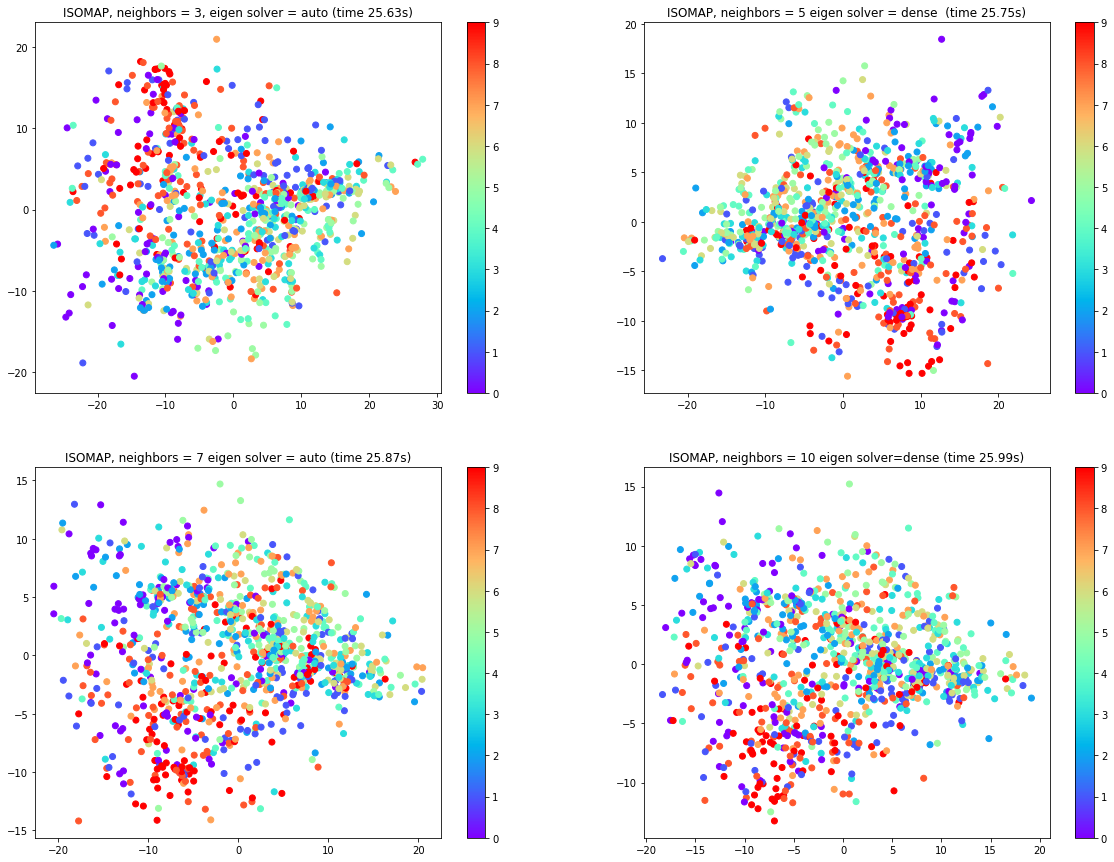

In [59]:
# Isomap Reduction 

t0 = time()
iso1 = Isomap(n_neighbors=3,n_components=2,eigen_solver="auto") 
X_iso1 = iso1.fit_transform(X) 

iso2 = Isomap(n_neighbors=5,n_components=2,eigen_solver="auto") 
X_iso2 = iso2.fit_transform(X) 

iso3 = Isomap(n_neighbors=7,n_components=2,eigen_solver="auto") 
X_iso3 = iso3.fit_transform(X)

iso4 = Isomap(n_neighbors=10,n_components=2,eigen_solver="auto")
X_iso4 = iso4.fit_transform(X) 

# Plots of the Isomap embeddings

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.scatter(X_iso1[:,0],X_iso1[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 3, eigen solver = auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(2,2,2)
plt.scatter(X_iso2[:,0],X_iso2[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 5 eigen solver = dense  (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(2,2,3)
plt.scatter(X_iso3[:,0],X_iso3[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 7 eigen solver = auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(2,2,4)
plt.scatter(X_iso4[:,0],X_iso4[:,1],c=y,cmap="rainbow")
plt.title( "ISOMAP, neighbors = 10 eigen solver=dense (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.show()

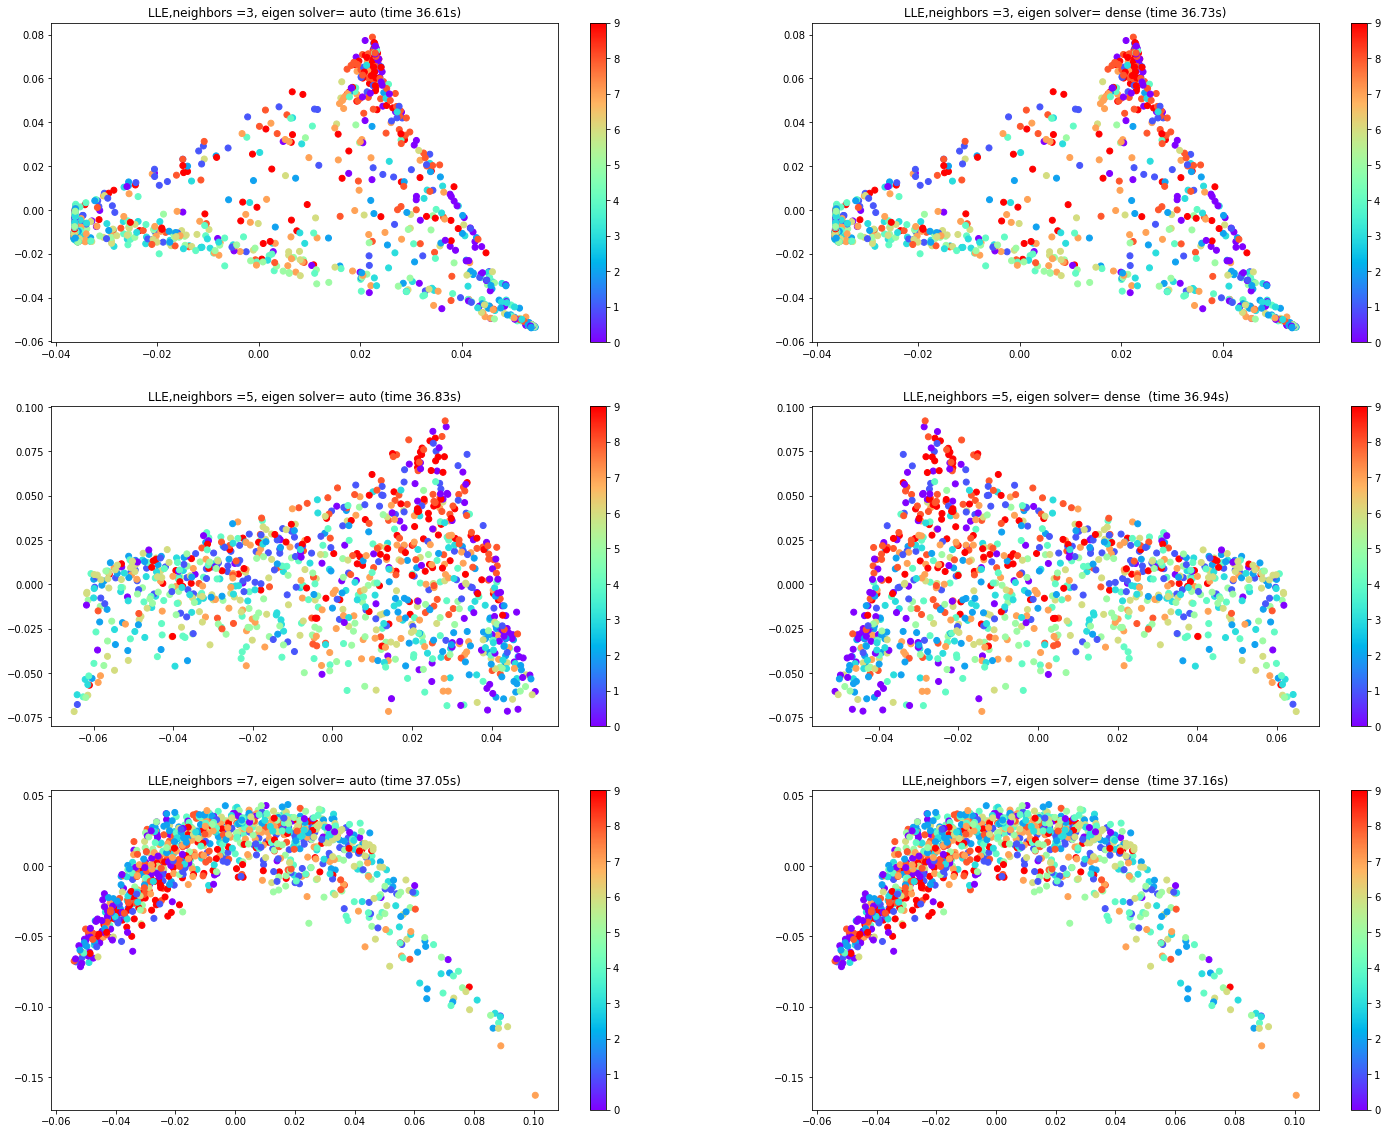

In [48]:
# LLE dimensional reduction 

t0 = time()
lle1 = LocallyLinearEmbedding(n_neighbors=3,n_components=2) 
X_lle1 = lle1.fit_transform(X) 

lle2 = LocallyLinearEmbedding(n_neighbors=3,n_components=2,eigen_solver="dense") 
X_lle2 = lle2.fit_transform(X) 

lle3 = LocallyLinearEmbedding(n_neighbors=10,n_components=2,eigen_solver="auto")
X_lle3 = lle3.fit_transform(X) 

lle4 = LocallyLinearEmbedding(n_neighbors=10,n_components=2,eigen_solver="dense") 
X_lle4 = lle4.fit_transform(X) 

lle5 = LocallyLinearEmbedding(n_neighbors=15,n_components=2,eigen_solver="auto") 
X_lle5 = lle5.fit_transform(X) 

lle6 = LocallyLinearEmbedding(n_neighbors=15,n_components=2,eigen_solver="dense") 
X_lle6 = lle6.fit_transform(X) 


#LLE plots

plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
plt.scatter(X_lle1[:,0],X_lle1[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =3, eigen solver= auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,2)
plt.scatter(X_lle2[:,0],X_lle2[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =3, eigen solver= dense (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,3)
plt.scatter(X_lle3[:,0],X_lle3[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =5, eigen solver= auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,4)
plt.scatter(X_lle4[:,0],X_lle4[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =5, eigen solver= dense  (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,5)
plt.scatter(X_lle5[:,0],X_lle5[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =7, eigen solver= auto (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,6)
plt.scatter(X_lle6[:,0],X_lle6[:,1],c=y,cmap="rainbow")
plt.title( "LLE,neighbors =7, eigen solver= dense  (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.show()

In [58]:
# Clustering with Isomap

#Dimensonality Reduction with ISOMap first

iso = Isomap(n_neighbors=7,n_components=2)
X_iso = iso.fit_transform(X)

# Setting the clustering operation 

clust = SpectralClustering(n_clusters=4,eigen_solver="arpack",affinity="nearest_neighbors")
X_isoC=clust.fit(X_iso)

y_pred = clust.fit_predict(X_iso)

clust1 = SpectralClustering(n_clusters=6,eigen_solver="arpack",affinity="nearest_neighbors")
X_isoC1=clust1.fit(X_iso)

y_pred1 = clust1.fit_predict(X_iso)

clust2 = SpectralClustering(n_clusters=8,eigen_solver="arpack",affinity="nearest_neighbors")
X_isoC2=clust2.fit(X_iso)

y_pred2 = clust2.fit_predict(X_iso)

#Homogeneity score

print("Homogeneity Score for custers 4: ", (homogeneity_score(y_pred,y))*100)
print("Homogeneity Score for custers 6: ", (homogeneity_score(y_pred1,y))*100)
print("Homogeneity Score for custers 8: ", (homogeneity_score(y_pred2,y))*100)

print(confusion_matrix(y, y_pred))
print(confusion_matrix(y, y_pred1))
print(confusion_matrix(y, y_pred2))


Harmonity Score:  10.0616198553642
Harmonity Score:  8.763599090241996
Harmonity Score:  9.258251064521467
[[29 47  4 22  0  0  0  0  0  0]
 [36 13 18 45  0  0  0  0  0  0]
 [10 38 17 34  0  0  0  0  0  0]
 [13 21 17 41  0  0  0  0  0  0]
 [12 17 15 55  0  0  0  0  0  0]
 [ 4 17 15 49  0  0  0  0  0  0]
 [ 9 16 26 56  0  0  0  0  0  0]
 [27 18 14 43  0  0  0  0  0  0]
 [52 18  2 27  0  0  0  0  0  0]
 [63  6  5 29  0  0  0  0  0  0]]
[[ 8 23 35  4  8 24  0  0  0  0]
 [18 28 16 18 24  8  0  0  0  0]
 [11 10 15 16 13 34  0  0  0  0]
 [10 12  8 17 25 20  0  0  0  0]
 [10 12  5 14 29 29  0  0  0  0]
 [ 6  6  2 14 34 23  0  0  0  0]
 [ 9 12  7 26 32 21  0  0  0  0]
 [ 5 23  9 14 26 25  0  0  0  0]
 [ 3 48 16  2 14 16  0  0  0  0]
 [14 61  8  5 10  5  0  0  0  0]]
[[13  8 32 18  1  4  8 18  0  0]
 [ 9 18 15 27  8 18 16  1  0  0]
 [27 11 11  3  1 16 14 16  0  0]
 [16 10  8  8 12 17 11 10  0  0]
 [27 10  4  8 15 14 17  4  0  0]
 [14  6  2  4 26 13 14  6  0  0]
 [20 11  6  4 14 25 19  8  0  0]


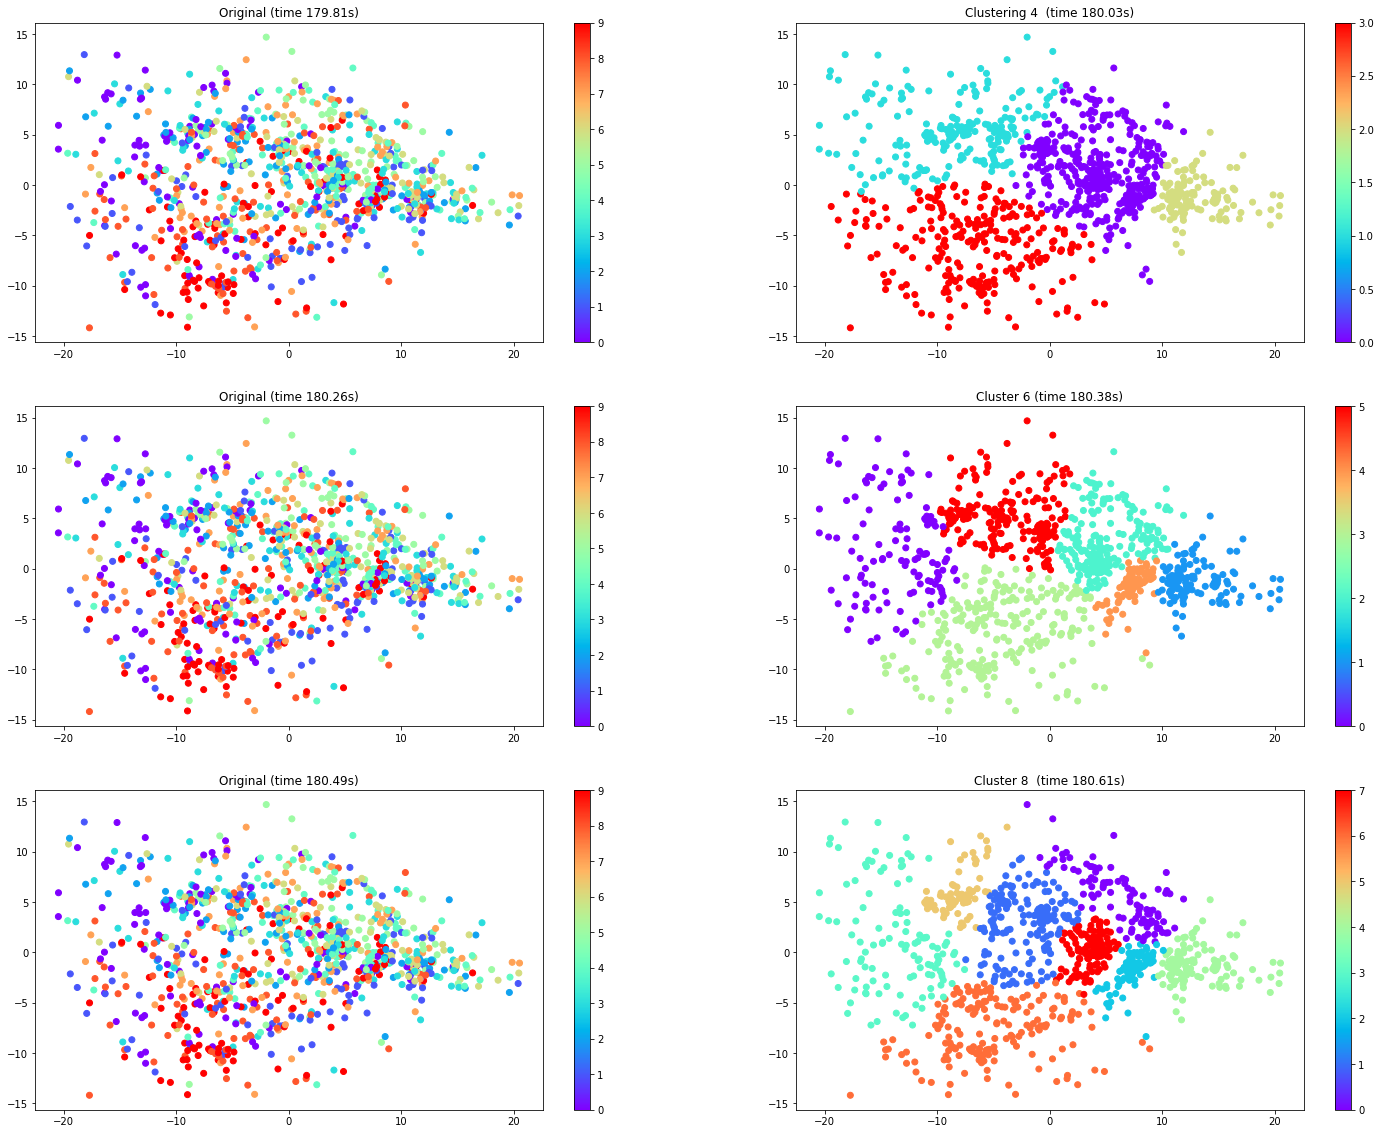

In [50]:
# subplots of the original (After evaluating Isomap reduction) data vs the clustered. 

plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y,cmap="rainbow")
plt.title( "Original (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,2)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_pred,cmap="rainbow")
plt.title( "Clustering 4  (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,3)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y,cmap="rainbow")
plt.title( "Original (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,4)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_pred1,cmap="rainbow")
plt.title( "Cluster 6 (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,5)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y,cmap="rainbow")
plt.title( "Original (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.subplot(3,2,6)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_pred2,cmap="rainbow")
plt.title( "Cluster 8  (time %.2fs)" %
               (time() - t0))
plt.colorbar()
plt.show()

In [52]:
purity = (47+45+38+41+55+49+56+43+52+63)/1000
purity1 = (35+28+34+25+29+34+32+26+48+61)/1000
purity2 = (32+27+27+17+27+27+25+24+37+53)/1000

print(purity*100)
print(purity1*100)
print(purity2*100)

48.9
35.199999999999996
29.599999999999998


In [54]:
Pur=[48.9,35.2,29.6]
Clus=["4 Clusters","6 Clusters","8 Clusters"]
Ho=[10.06,8.76,9.32]

In [55]:
#Tota Results.

Result = pd.DataFrame({"Clusters":Clus,
                       "Homogeneity Score":Ho,
                       "Purity Score":Pur},
                      columns=["Clusters","Homogeneity Score","Purity Score"])
Result

,Clusters,Homogeneity Score,Purity Score
0,4 Clusters,10.06,48.9
1,6 Clusters,8.76,35.2
2,8 Clusters,9.32,29.6
